# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0383 Петровская Евгения. Вариант №62

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения
и анализа сетей аффилированности.

## Основные теоретические положения

Подгруппа - любое подмножество акторов и все связи между ними.

Группа - совокупность акторов, связи между которыми должны быть изучены.

Сплоченные подгруппы - множества акторов, которые соединены между собой многочисленными сильными прямыми связями.

Клика - максимальный полный подграф с 3 и более вершинами.

n-клика - максимальный подграф, в котором наибольшие геодезические расстояния между узлами не больше чем n.

n-Клан - n-клика, в которой геодезические расстояния между узлами не превышают n для путей внутри подграфа.

n-Клуб - максимальный подграф диаметра не больше n

k-Ядро - максимальный подграф, в котором каждая вершина связана с не менее чем k вершинами этого подграфа

k-Плекс - максимальный подграф, содержащий $g_S$ узлов, в котором каждый узел смежен с не менее чем $g_S-k$ узлами.

Модулярность - характеристика структуры сети, разница долей связей внутри группы и ожидаемой долей связей, если бы связи были размещены случайно

Сеть аффилированности - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы. Состоит из множества акторов $\mathcal{N}$ и множества событий $\mathcal{M}$. Может быть представлена с помощью матрицы инцидентности X размера $g\times h$ (g - число акторов, h - число событий), в которой элемент $a_{ij}$ равен 1, если актор i связан с актором j, и равен 0 иначе.

Степень участия - количество событий, с которыми связан актор

Размер события - число акторов, связанных с данным событием

Матрица перекрытия событий - $X^{\mathcal{M}}=X^TX$ - на диагонали - сколько акторов посетило каждое событие.

Матрица соучастия акторов - $X^{\mathcal{N}}=XX^T$ - на диагонали - сколько событий посетил актор.

Плотность для отношения соучастия - $\Delta_\mathcal{N}=\frac{1}{g(g-1)}\sum^g_{i=1}\sum^g_{j=1}X^{\mathcal{N}}_{ij}$

Плотность для отношения перекрытия - $\Delta_\mathcal{M}=\frac{1}{h(h-1)}\sum^h_{k=1}\sum^k_{i=1}X^{\mathcal{M}}_{ki}$

Клика уровня $c$ - для взвешенного графа - клика, в которой веса всех рёбер не меньше $c$; для отношения соучастия - подграф, в котором все пары акторов участвуют не менее чем в $c$ событиях; для отношения перекрытия - подграф, в котором все пары событий имеют не менее $c$ общих членов.

Диаметр сети аффилированности - максимальная длина пути между всеми парами акторов или событий.



Отношение шансов - мера перекрытия между событиями, которая не зависит от размера событий $\Theta_{kl}=\frac{X^{\mathcal{M}}_{kl}X^{\mathcal{M}}_{\overline{kl}}}{X^{\mathcal{M}}_{\overline{k}l}X^{\mathcal{M}}_{k\overline{l}}}$,

где $X^{\mathcal{M}}_{kl}$ - число акторов, аффилированных с событиями $k$ и $l$,
$X^{\mathcal{M}}_{\overline{k}l}$ - число акторов, аффилированных с событием $l$ но не с событием $k$,
$X^{\mathcal{M}}_{k\overline{l}}$ - число акторов, аффилированных с событием $k$ но не с событием $l$
$X^{\mathcal{M}}_{\overline{kl}}$ - число акторов, не аффилированных ни с событием $k$ ни с событием $l$,



## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести
исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

1. Из файла florentine_marital.csv извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

In [2]:
## Установим и подключим необходимые для работы пакеты

install.packages("statnet")
install.packages("igraph")
install.packages("sna")
install.packages("HyperG")


library(statnet)
library(igraph)
library(sna)
library(HyperG)

Warning message:
"пакет ''statnet'' сейчас используется и не будет установлен"
Warning message:
"пакет ''igraph'' сейчас используется и не будет установлен"
Warning message:
"пакет ''sna'' сейчас используется и не будет установлен"
Warning message:
"пакет ''HyperG'' сейчас используется и не будет установлен"


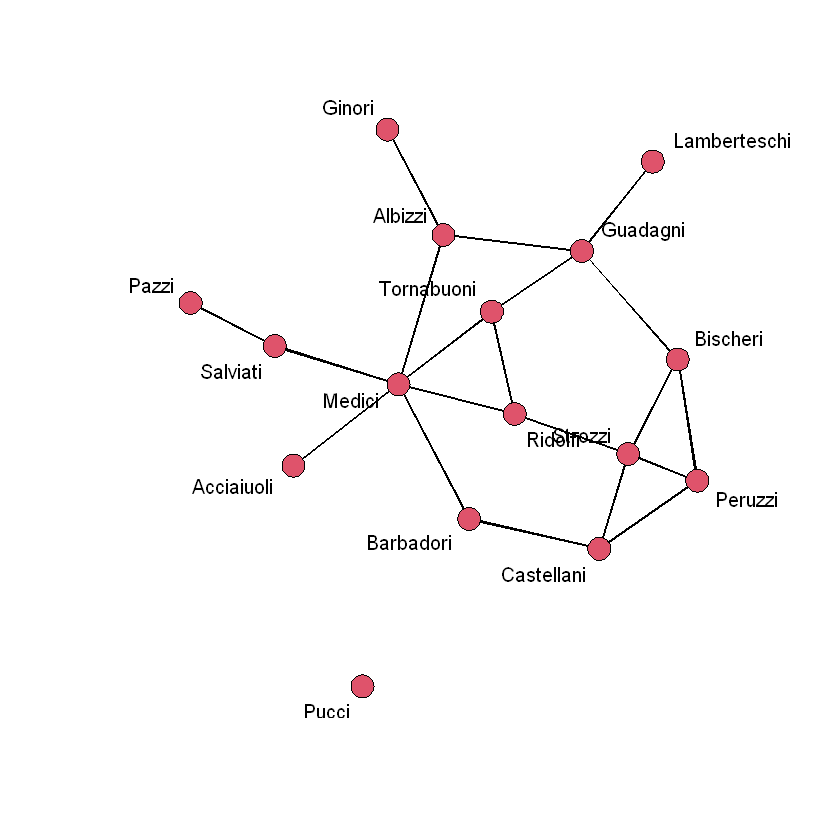

In [4]:
## Социоматрица:

task1 <- function() {
  nodes <-read.csv("florentine_marital.csv",header = T,skip = 1)
  rownames(nodes) <- colnames(nodes)
  arr <- network(as.matrix(nodes), matrix.type = "adjacency", directed = FALSE);
    
  return(nodes)
}

draw <- function(mtrx) {
  gplot(mtrx, mode = "fruchtermanreingold", gmode = "graph", displaylabels = T) ##Fruchterman Reingold layout
}

net <- task1()
draw(net)

g <- data.matrix(net)
net <- graph_from_adjacency_matrix(g, mode = "undirected")

2. Ислледовать сеть на подгруппы:
    * n-клик
    * n-кланов
    * n-клубов
    * k-ядер
    * k-плексов

In [6]:
get_cliques <- function(graph, order){
  graph <- connect(graph, order=order)
  return(max_cliques(graph,min=3))
}

is_clan <-function(graph, clique, name){
  subgraph <- subgraph(graph, clique)
  order <- unlist(strsplit(name,"-"))[1]
  diameter <- diameter(subgraph,directed = FALSE)
  if(diameter > order){
    return(FALSE)
  }
  return (TRUE)
}

clqs <- function(net){
  graph <- graph.adjacency(as.matrix(net), mode="undirected")
  order <- 1
  len <- 2
  res <- list()
    
  while(len > 1){
    cliques <- get_cliques(graph,order)
    cliques <- lapply(cliques, function(x) names(x))
    names(cliques) <- rep(paste(order,"clique",sep= "-"),times = length(cliques))
    res <- c(res,cliques)
    order <- order+1
    len <- length(cliques)
  }
  return (res)
}

clans <-function(net){
  graph <- graph.adjacency(as.matrix(net), mode="undirected")
  cliques <- clqs(net)
  mask <- 1:length(cliques)
  mask <-sapply(mask, function(x) is_clan(graph,cliques[[x]],names(cliques)[x]))
  names(cliques)<-sapply(names(cliques), function(x) paste(unlist(strsplit(x,"-"))[1],"-clan",sep = ""))
  return(cliques[mask])
}
                         
cores <-function(net){
  graph <- graph.adjacency(as.matrix(net), mode="undirected")
  info <- coreness(graph, mode= "all")
  res <-lapply(0:max(as.integer(info)), function(x) names(info)[which(as.integer(info) >= x)])
  names(res) <- sapply(1:length(res), function(x) paste(x-1,"core",sep= "-"))
  return(res)
}

clqs(net)
print('-------------------------------------------')
clans(net)
print('-------------------------------------------')
cores(net)

Warning message in connect(graph, order = order):
"At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged."


$`1-clique`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-clique`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-clique`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-clique`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-clique`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-clique`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-clique`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-clique`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Barbadori" 

$`2-clique`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-clique`
[1] "Guadagni" "Ridolfi"  "Peruzzi"  "Strozzi"  "Bischeri"

$`2-clique`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Bischeri"  

$`2-clique`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-clique`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-clique`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Medici"    

$`2-clique`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`2-clique`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Strozzi"   

$`3-clique`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-clique`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Bischeri"  

$`3-clique`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-clique`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-clique`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Salviati"   "Acciaiuoli"

$`3-clique`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-clique`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-clique`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-clique`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-clique`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

[1] "-------------------------------------------"


Warning message in connect(graph, order = order):
"At core/operators/connect_neighborhood.c:77 : Order smaller than two, graph will be unchanged."


$`1-clan`
[1] "Medici"     "Ridolfi"    "Tornabuoni"

$`1-clan`
[1] "Peruzzi"  "Strozzi"  "Bischeri"

$`1-clan`
[1] "Peruzzi"    "Strozzi"    "Castellani"

$`2-clan`
[1] "Pazzi"    "Medici"   "Salviati"

$`2-clan`
[1] "Ginori"   "Albizzi"  "Medici"   "Guadagni"

$`2-clan`
[1] "Lamberteschi" "Albizzi"      "Tornabuoni"   "Guadagni"     "Bischeri"    

$`2-clan`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Medici"     "Barbadori" 

$`2-clan`
[1] "Castellani" "Ridolfi"    "Strozzi"    "Peruzzi"    "Bischeri"  

$`2-clan`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Albizzi"    "Medici"    

$`2-clan`
[1] "Guadagni"   "Ridolfi"    "Tornabuoni" "Strozzi"    "Bischeri"  

$`2-clan`
[1] "Medici"     "Barbadori"  "Tornabuoni" "Ridolfi"    "Salviati"  
[6] "Albizzi"    "Acciaiuoli"

$`3-clan`
[1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Salviati"   "Ridolfi"   
[6] "Medici"     "Barbadori"  "Albizzi"   

$`3-clan`
[1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
[6] "Guadagni"   "Ginori"     "Salviati"   "Acciaiuoli"

$`3-clan`
 [1] "Barbadori"  "Albizzi"    "Tornabuoni" "Ridolfi"    "Medici"    
 [6] "Guadagni"   "Strozzi"    "Castellani" "Bischeri"   "Peruzzi"   

$`3-clan`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Ginori"      

$`3-clan`
[1] "Bischeri"     "Albizzi"      "Tornabuoni"   "Ridolfi"      "Medici"      
[6] "Guadagni"     "Lamberteschi" "Strozzi"      "Peruzzi"     

$`4-clan`
 [1] "Pazzi"      "Acciaiuoli" "Tornabuoni" "Strozzi"    "Salviati"  
 [6] "Ridolfi"    "Medici"     "Guadagni"   "Ginori"     "Castellani"
[11] "Barbadori"  "Albizzi"   

$`4-clan`
 [1] "Barbadori"    "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Medici"       "Lamberteschi" "Guadagni"    
[11] "Ginori"       "Castellani"   "Bischeri"     "Albizzi"     

$`5-clan`
 [1] "Albizzi"      "Acciaiuoli"   "Tornabuoni"   "Strozzi"      "Salviati"    
 [6] "Ridolfi"      "Peruzzi"      "Pazzi"        "Medici"       "Lamberteschi"
[11] "Guadagni"     "Ginori"       "Castellani"   "Bischeri"     "Barbadori"

[1] "-------------------------------------------"


$`0-core`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Pucci"        "Ridolfi"      "Salviati"     "Strozzi"     
[16] "Tornabuoni"  

$`1-core`
 [1] "Acciaiuoli"   "Albizzi"      "Barbadori"    "Bischeri"     "Castellani"  
 [6] "Ginori"       "Guadagni"     "Lamberteschi" "Medici"       "Pazzi"       
[11] "Peruzzi"      "Ridolfi"      "Salviati"     "Strozzi"      "Tornabuoni"  

$`2-core`
 [1] "Albizzi"    "Barbadori"  "Bischeri"   "Castellani" "Guadagni"  
 [6] "Medici"     "Peruzzi"    "Ridolfi"    "Strozzi"    "Tornabuoni"

Вывод:
* 5-клики и клики после совпадают, поскольку между людыми двумя вершинами геодезические расстояния в графе <= 5. 0-клики не рассматриваются, так как случ. вырожденный.

* 5-кланы и последующие также совпадают по той же причине

* 0-ядро не строилось, так как это весь граф. Ядра > 2 не существуют для данного графа.

3. С помощью библиотеки igraph исследовать алгоритмы обноружения сообществ в зависимости от номера варианта:
(2) Spinglass, Walktrap, Label propagation;
Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

Class 'communities'  hidden list of 6
 $ merges    : num [1:14, 1:2] 11 5 13 4 1 7 10 2 3 19 ...
 $ modularity: num [1:15] -0.0838 -0.0488 0.025 0.0638 0.1263 ...
 $ membership: num [1:16] 2 1 3 3 3 1 1 1 2 4 ...
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "walktrap"


$`1`
[1] "Albizzi"      "Ginori"       "Guadagni"     "Lamberteschi"

$`2`
[1] "Acciaiuoli" "Medici"     "Ridolfi"    "Tornabuoni"

$`3`
[1] "Barbadori"  "Bischeri"   "Castellani" "Peruzzi"    "Strozzi"   

$`4`
[1] "Pazzi"    "Salviati"

$`5`
[1] "Pucci"

Class 'communities'  hidden list of 5
 $ membership: num [1:16] 1 2 1 2 2 2 2 2 1 1 ...
 $ modularity: num 0.295
 $ names     : chr [1:16] "Acciaiuoli" "Albizzi" "Barbadori" "Bischeri" ...
 $ vcount    : int 16
 $ algorithm : chr "label propagation"


$`1`
[1] "Acciaiuoli" "Barbadori"  "Medici"     "Pazzi"      "Ridolfi"   
[6] "Salviati"   "Tornabuoni"

$`2`
[1] "Albizzi"      "Bischeri"     "Castellani"   "Ginori"       "Guadagni"    
[6] "Lamberteschi" "Peruzzi"      "Strozzi"     

$`3`
[1] "Pucci"

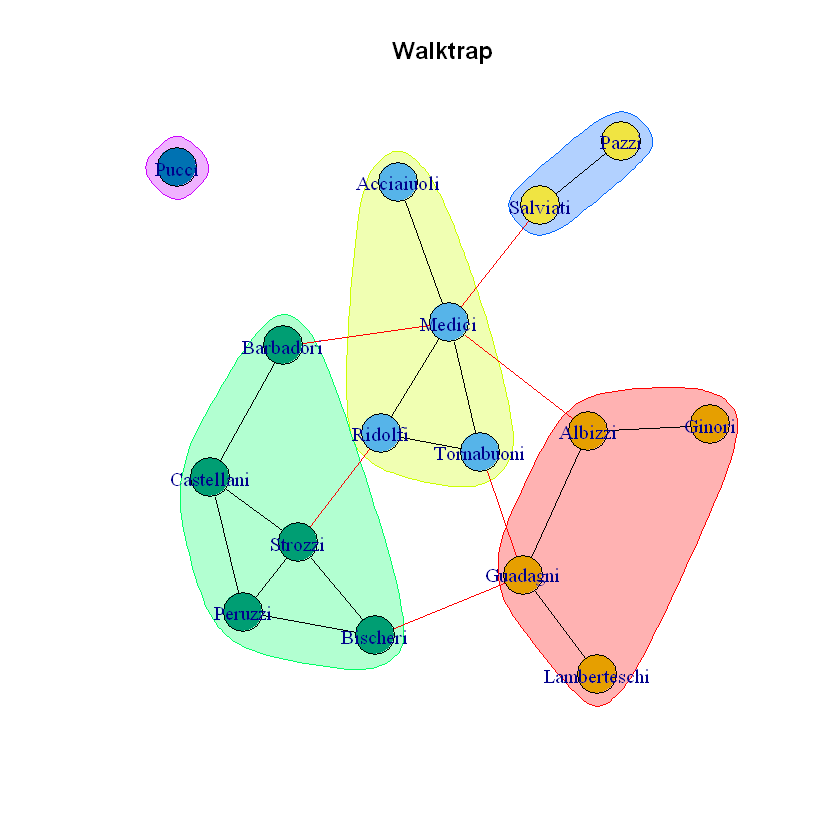

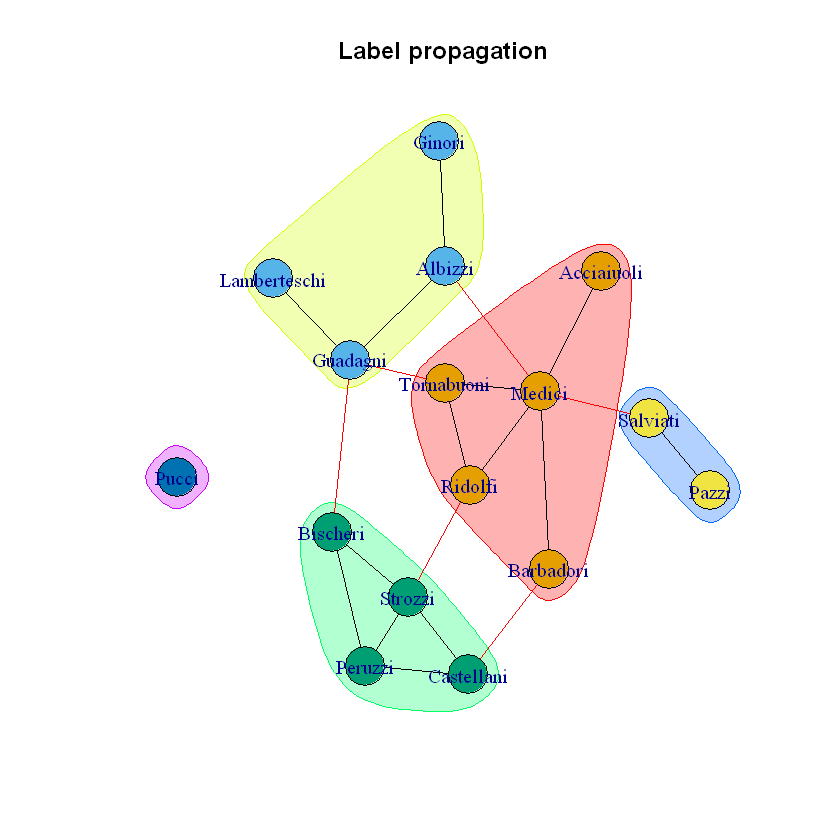

In [7]:
#граф несвязный, потому spinglass не работает на нем
x1<-cluster_walktrap(net)
str(x1)

x1[ 1:length(x1) ]
x2<-cluster_label_prop(net)
str(x2) 

x2[ 1:length(x2) ]
plot(cluster_walktrap(net), net, layout = layout_with_fr(net), main = "Walktrap")
plot(cluster_label_prop(net), net, layout = layout_with_fr(net), main = "Label propagation")

* Spinglass - алгоритм основан на статистической механической модели спинового стекла с имитацией отжига
* Walktrap - алгоритм основан на случайном блуждании в графе
* Label propagation - каждый узел инициализируется уникальной меткой, и на каждом шаге каждый узел принимает метку, которую в настоящее время имеет большинство его соседей

Судя во всему, алгоритмы Walktrap и Label propagation определяют все изолированные вершины в отдельные сообщество, а остальные делятся на группы по принципу много связей внутрь и мало - наружу.

4.  Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

In [8]:
ceo <- as.matrix(read.csv("ceo.csv", comment.char="#", header = FALSE))
ceo

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


5. Отобразить сеть в виде биграфа

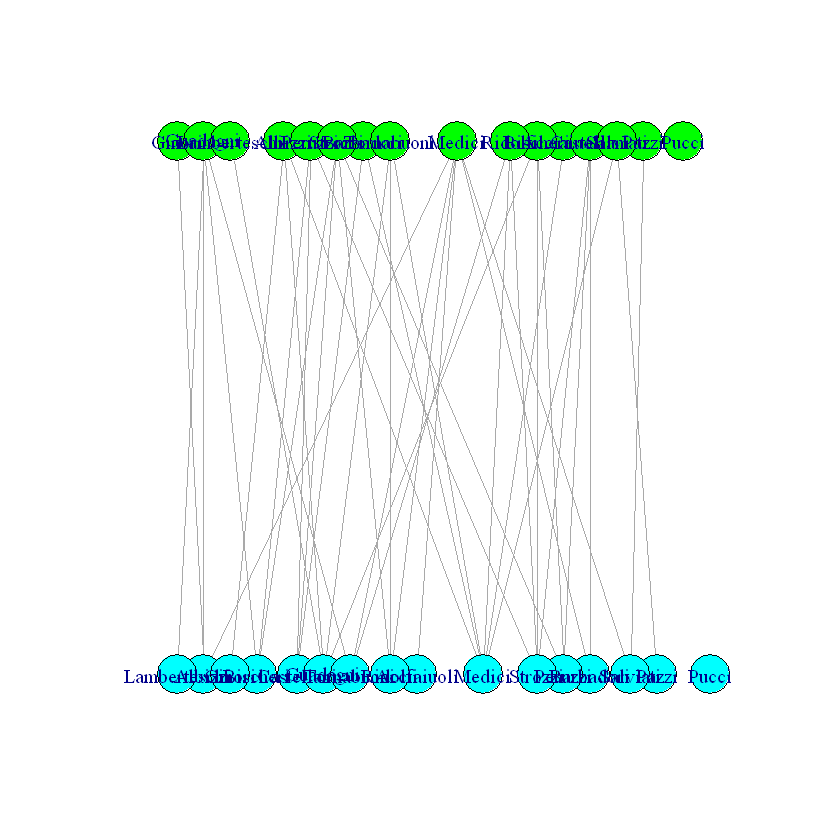

In [9]:
biparite <- graph.incidence(net, weighted = TRUE)
colrs <- c("green", "cyan")[V(biparite)$type + 1L]
plot(biparite, vertex.color = colrs, layout = layout_as_bipartite)

6. Отобразить сеть в виде гиперграфа и двойственного гиперграфа
(по желанию).

7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов.

[1] "Матрица соучастия акторов:"


3,1,1,1,1,1,2,1,1,2,⋯,1,2,3,2,2,1,1,2,1,1
1,3,1,1,1,1,1,1,0,1,⋯,2,0,2,1,1,1,1,1,1,1
1,1,2,1,1,1,1,0,0,1,⋯,2,1,1,1,1,1,1,1,1,2
1,1,1,3,1,2,1,0,0,1,⋯,3,1,1,3,1,2,3,2,2,2
1,1,1,1,3,2,1,0,0,1,⋯,1,1,1,1,1,1,1,1,2,1
1,1,1,2,2,3,1,0,0,1,⋯,2,0,1,2,1,1,2,1,2,2
2,1,1,1,1,1,4,2,2,1,⋯,2,1,2,3,2,1,1,2,1,1
1,1,0,0,0,0,2,3,2,0,⋯,0,1,2,1,1,0,0,1,0,0
1,0,0,0,0,0,2,2,4,0,⋯,0,1,2,1,2,1,0,2,0,0
2,1,1,1,1,1,1,0,0,2,⋯,1,1,2,1,1,1,1,1,1,1
2,1,1,2,1,2,1,0,0,2,⋯,2,1,2,2,1,1,2,1,2,2


[1] "Матрица перекрытия событий:"


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,3,0,2,3,0,1,1,1,1,1,0,0,0,0,1
V2,0,11,11,2,1,3,0,1,1,0,3,3,3,2,6
V3,2,11,22,8,3,4,2,3,5,1,4,4,4,3,8
V4,3,2,8,12,1,1,3,2,4,3,3,2,2,0,4
V5,0,1,3,1,3,0,1,0,1,0,1,1,0,0,1
V6,1,3,4,1,0,4,0,1,0,0,0,0,1,1,3
V7,1,0,2,3,1,0,4,0,1,1,0,0,0,0,0
V8,1,1,3,2,0,1,0,4,0,1,0,0,0,1,1
V9,1,1,5,4,1,0,1,0,6,0,0,1,1,0,1
V10,1,0,1,3,0,0,1,1,0,3,1,0,0,0,0


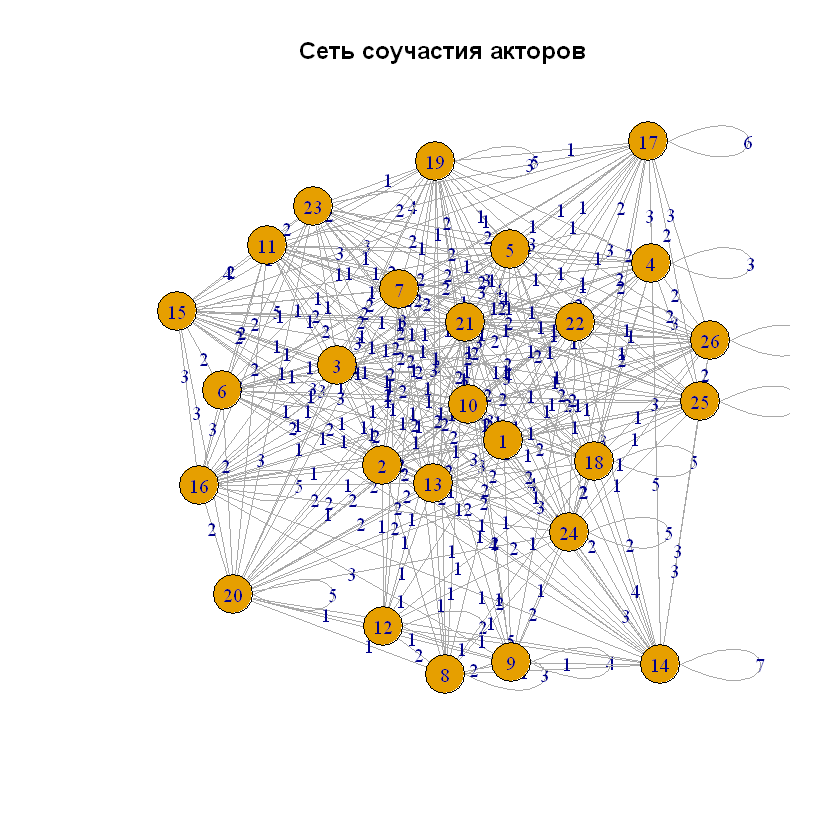

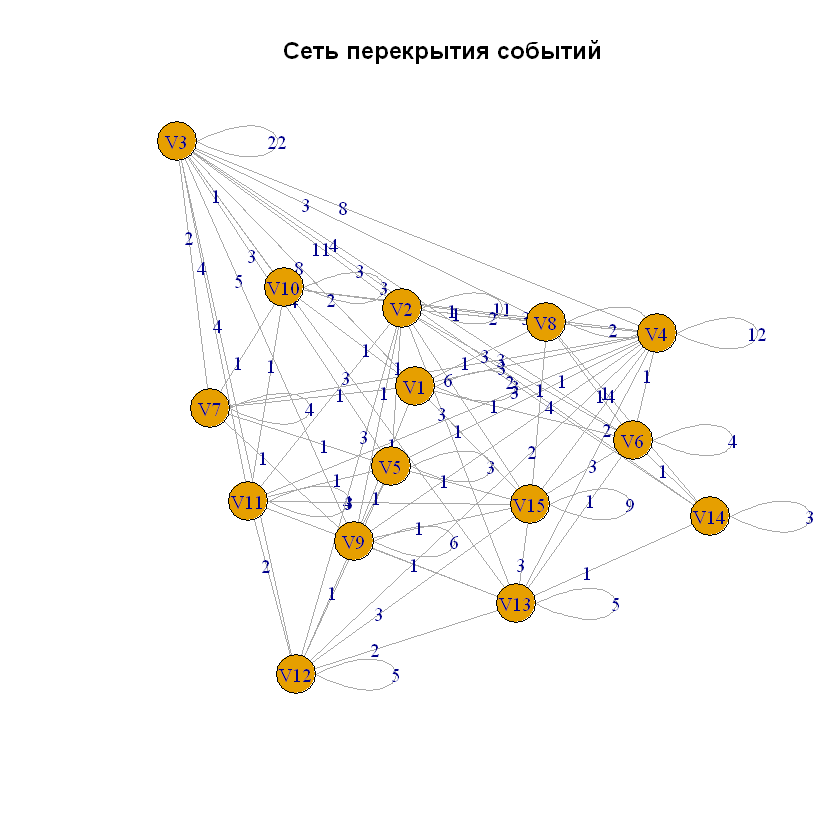

In [15]:
## Матрица соучастия
X <- ceo
X_N <- X %*% t(X)
print("Матрица соучастия акторов:")
X_N
graph<-graph_from_adjacency_matrix(X_N, mode = "undirected", weighted = TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), main='Сеть соучастия акторов')

##Матрица перекрытия
X_M <- t(X) %*% X
print("Матрица перекрытия событий:")
X_M
graph <- graph_from_adjacency_matrix(X_M, mode="undirected", weighted=TRUE)
plot(graph, edge.label=E(graph)$weight, layout=layout_with_kk(graph), , main='Сеть перекрытия событий')
     

8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [79]:
degree<-compl[row(compl)==col(compl)]
for(i in 1:length(degree)){
    cat("Actor", i, "is affiliated with the ", degree[i], "event\n")
}

cat('Mean is: ', sum(degree)/length(degree))

Actor 1 is affiliated with the  3 event
Actor 2 is affiliated with the  3 event
Actor 3 is affiliated with the  2 event
Actor 4 is affiliated with the  3 event
Actor 5 is affiliated with the  3 event
Actor 6 is affiliated with the  3 event
Actor 7 is affiliated with the  4 event
Actor 8 is affiliated with the  3 event
Actor 9 is affiliated with the  4 event
Actor 10 is affiliated with the  2 event
Actor 11 is affiliated with the  3 event
Actor 12 is affiliated with the  2 event
Actor 13 is affiliated with the  4 event
Actor 14 is affiliated with the  7 event
Actor 15 is affiliated with the  5 event
Actor 16 is affiliated with the  5 event
Actor 17 is affiliated with the  6 event
Actor 18 is affiliated with the  5 event
Actor 19 is affiliated with the  5 event
Actor 20 is affiliated with the  5 event
Actor 21 is affiliated with the  3 event
Actor 22 is affiliated with the  3 event
Actor 23 is affiliated with the  4 event
Actor 24 is affiliated with the  5 event
Actor 25 is affiliated wi

9. Вычислить размер и средний размер для каждого события.

In [81]:
size <- event[row(event)==col(event)]
for(i in 1:length(size)){
    cat("Event", i, "has size: ", size[i], "\n")
}

cat("Mean event size is: ", sum(size)/length(size))

Event 1 has size:  3 
Event 2 has size:  11 
Event 3 has size:  22 
Event 4 has size:  12 
Event 5 has size:  3 
Event 6 has size:  4 
Event 7 has size:  4 
Event 8 has size:  4 
Event 9 has size:  6 
Event 10 has size:  3 
Event 11 has size:  4 
Event 12 has size:  5 
Event 13 has size:  5 
Event 14 has size:  3 
Event 15 has size:  9 
Mean event size is:  6.533333

10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [84]:
densityParticipation <- (sum(compl)-sum(diag(compl)))/(nrow(compl)*(nrow(compl)-1))
cat("Плотность для соотношения соучастия: ", densityParticipation, '\n')
densityEvent <- (sum(event)-sum(diag(event)))/(nrow(event)*(nrow(event)-1))
cat("Плотность для соотношения перекрытия: ", densityEvent, '\n')

Плотность для соотношения соучастия:  1.412308 
Плотность для соотношения перекрытия:  1.485714 


в среднем в каждой паре различных директоров оба состоят в 1 или 2х общих клубах, а в каждой паре разных клубов имеются 1-2 общих директора

11. Определить диаметр сети аффилированности

In [92]:
cat("Affiliation net diameter is: ", diameter(graph.incidence(ceo, mode = "all")))

Affiliation net diameter is:  5

12. Определить клики уровня 𝑐 = {4, 3} для отношения соучастия и клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий

In [19]:
tmp <- tcrossprod(ceo)
tmp1 <- graph.adjacency(tmp, mode = 'undirected', weighted = T)

#Клики уровня c = {4, 3}
graph1 <- delete.edges(tmp1, E(tmp1)[E(tmp1)$weight < 4])
res_4 <- max_cliques(graph1, min=3) 
graph1 <- delete.edges(tmp1, E(tmp1)[E(tmp1)$weight < 3])
res_3 <- max_cliques(graph1, min=3)

cat("Клики уровня 𝑐 = {4,3} для отношения соучастия:", "\n")
res_4
res_3

tmp <- graph.adjacency(X_M, mode = 'undirected', weighted = T)

graph2 <- delete.edges(tmp, E(tmp)[E(tmp)$weight < 6])
res6 <-max_cliques(graph2, min=3) 
graph2 <- delete.edges(tmp, E(tmp)[E(tmp)$weight < 5])
res5 <- max_cliques(graph2, min=3) 
graph2 <- delete.edges(tmp, E(tmp)[E(tmp)$weight < 4])
res4 <- max_cliques(graph2, min=3)
graph2 <- delete.edges(tmp, E(tmp)[E(tmp)$weight < 3])
res3 <- max_cliques(graph2, min=3)
graph2 <- delete.edges(tmp, E(tmp)[E(tmp)$weight < 2])
res2 <- max_cliques(graph2, min=3)  

cat("Клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий:", "\n")
res6
res5
res4
res3
res2

Клики уровня 𝑐 = {4,3} для отношения соучастия: 


[[1]]
+ 3/26 vertices, from 979d2b7:
[1] 20 14 17


[[1]]
+ 3/26 vertices, from 979e527:
[1]  1 13 19

[[2]]
+ 3/26 vertices, from 979e527:
[1]  7 14 20

[[3]]
+ 3/26 vertices, from 979e527:
[1] 16 15 23

[[4]]
+ 3/26 vertices, from 979e527:
[1] 25 14 15

[[5]]
+ 3/26 vertices, from 979e527:
[1] 26 14 17

[[6]]
+ 5/26 vertices, from 979e527:
[1] 24 14 23 20 15

[[7]]
+ 6/26 vertices, from 979e527:
[1] 14  4 23 20 17 15


Клики уровня 𝑐 = {6, 5, 4, 3, 2} для отношения перекрытия событий: 


[[1]]
+ 3/15 vertices, named, from 97a79be:
[1] V2  V3  V15


[[1]]
+ 3/15 vertices, named, from 97a92a9:
[1] V2  V3  V15


[[1]]
+ 3/15 vertices, named, from 97ab173:
[1] V15 V3  V2 

[[2]]
+ 3/15 vertices, named, from 97ab173:
[1] V15 V3  V4 

[[3]]
+ 3/15 vertices, named, from 97ab173:
[1] V4 V3 V9


[[1]]
+ 3/15 vertices, named, from 97ac9f7:
[1] V9 V3 V4

[[2]]
+ 4/15 vertices, named, from 97ac9f7:
[1] V13 V2  V15 V3 

[[3]]
+ 4/15 vertices, named, from 97ac9f7:
[1] V15 V3  V2  V6 

[[4]]
+ 4/15 vertices, named, from 97ac9f7:
[1] V15 V3  V2  V11

[[5]]
+ 4/15 vertices, named, from 97ac9f7:
[1] V15 V3  V2  V12

[[6]]
+ 4/15 vertices, named, from 97ac9f7:
[1] V15 V3  V4  V11


[[1]]
+ 3/15 vertices, named, from 97ae1ec:
[1] V1 V3 V4

[[2]]
+ 3/15 vertices, named, from 97ae1ec:
[1] V7 V3 V4

[[3]]
+ 3/15 vertices, named, from 97ae1ec:
[1] V8 V3 V4

[[4]]
+ 3/15 vertices, named, from 97ae1ec:
[1] V9 V3 V4

[[5]]
+ 3/15 vertices, named, from 97ae1ec:
[1] V14 V2  V3 

[[6]]
+ 4/15 vertices, named, from 97ae1ec:
[1] V6  V2  V15 V3 

[[7]]
+ 6/15 vertices, named, from 97ae1ec:
[1] V15 V2  V12 V4  V3  V11

[[8]]
+ 6/15 vertices, named, from 97ae1ec:
[1] V15 V2  V12 V4  V3  V13


13. Для каждых пар событий определить отношение шансов. Сделать выводы.

In [20]:
kl <- t(ceo) %*% ceo
not_kl <- (1 - t(ceo)) %*% (1 - ceo)
not_k_l <- (1 - t(ceo)) %*% ceo
k_not_l <- t(ceo) %*% (1 - ceo)

res <- c()

for(i in 2:nrow(kl)){
    for(j in 1:(i-1)){
        cat(paste("Theta(", i, ",", j, ") = ", (kl[i,j]*not_kl[i,j])/(not_k_l[i,j]*k_not_l[i,j]), sep=" "), "\n")
    }
}

Theta( 2 , 1 ) =  0 
Theta( 3 , 1 ) =  0.3 
Theta( 3 , 2 ) =  Inf 
Theta( 4 , 1 ) =  Inf 
Theta( 4 , 2 ) =  0.111111111111111 
Theta( 4 , 3 ) =  0 
Theta( 5 , 1 ) =  0 
Theta( 5 , 2 ) =  0.65 
Theta( 5 , 3 ) =  Inf 
Theta( 5 , 4 ) =  0.545454545454545 
Theta( 6 , 1 ) =  3.33333333333333 
Theta( 6 , 2 ) =  5.25 
Theta( 6 , 3 ) =  Inf 
Theta( 6 , 4 ) =  0.333333333333333 
Theta( 6 , 5 ) =  0 
Theta( 7 , 1 ) =  3.33333333333333 
Theta( 7 , 2 ) =  0 
Theta( 7 , 3 ) =  0.1 
Theta( 7 , 4 ) =  4.33333333333333 
Theta( 7 , 5 ) =  3.33333333333333 
Theta( 7 , 6 ) =  0 
Theta( 8 , 1 ) =  3.33333333333333 
Theta( 8 , 2 ) =  0.4 
Theta( 8 , 3 ) =  0.473684210526316 
Theta( 8 , 4 ) =  1.2 
Theta( 8 , 5 ) =  0 
Theta( 8 , 6 ) =  2.11111111111111 
Theta( 8 , 7 ) =  0 
Theta( 9 , 1 ) =  1.8 
Theta( 9 , 2 ) =  0.2 
Theta( 9 , 3 ) =  0.882352941176471 
Theta( 9 , 4 ) =  3 
Theta( 9 , 5 ) =  1.8 
Theta( 9 , 6 ) =  0 
Theta( 9 , 7 ) =  1.13333333333333 
Theta( 9 , 8 ) =  0 
Theta( 10 , 1 ) =  5.25 
Theta(

Вывод: в результате вычислений встречается множество нулей, т.е. существуют события, не имеющих общих акторов. Там же, где значение = бесконечности, актор встречается в обоих событиях.

## Выводы


14. Сделать общий вывод по работе

При выполнении данной практической работы были изучены способы работы с математическими пакетами с целью исследования подгрупп социальных сетей, моделирования и отображения сетей аффилированности. 